In [62]:
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np 
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
credentials = {
    'public' : 'e2b7e92cf8684577a314a8804b97337a', 
    'private': 'a847df678a5145d0a62381b255e4e4fd'
    }

client_credentials_manager = SpotifyClientCredentials(client_id=credentials['public'], client_secret=credentials['private'])
spotyCarlo = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Part 2 
## Popularity of a song
The Spotify for Developers API provide also another type of data: a track's popularity. Using the track "id" we can retrieve, with a little code, the actual popularity value for that particular track, and add these data into our dataset.

In [82]:
CreateNewDataset = False   # Set to false cause we have already run this and the dataset with popularity is ready, see dataframeV2.csv
if CreateNewDataset:
    dF = pd.read_csv('data\csvs\dataframeV1.csv', index_col=0)

    def addPop(id):
        return spotyCarlo.track(id)['popularity']

    dF.insert(15,'popularity',np.array(list(map(addPop,dF.iloc[:,11]))))
    dF.to_csv('data\csvs\dataframeV2.csv')

dF = pd.read_csv('data\csvs\dataframeV2.csv', index_col=0)
X = dF[['popularity']]
X

,popularity
0,67
1,60
2,60
3,56
4,0
...,...
45,53
46,58
47,61
48,50


But how do you quantify the popularity of a song? According to Spotify, “The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.”

we think this value is also used for music recommendation and to build the various "Trend" playlists.

Let's now explore a few plots and visualizations.

## 2.1 - Explore the data.

Since predicting popularity is our north star, I’m curious to see what the popularity distribution is across the dataset.

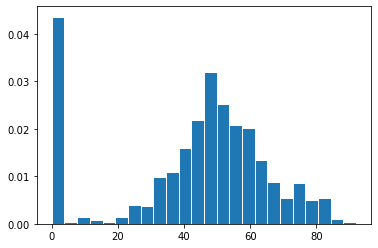

In [106]:
_ = plt.hist(dF[['popularity']],density = True, bins = 24,edgecolor='white',)